# Decision Trees
- Popular for both classification and regression.
- Each node represents a specific attribute or independent variable
- Each brach represents a possible value of attribute utilized in the connected node.
- Easily handles continuous nominal and ordinal attributes.
- Easily handles missing values
- No need for normalization since each attribute is individually evaluated.
- There could be more than one tree that fits the same data
- Many algorithms: Hunt's Algorithm, CART, ID3,C4.5, SLIQ, SPRINT
- **Hunt's Algorithm Structure:**
  1. if Dt is the set of training records that reach a node t, then if Dt contains records that belong to the same class yt, then t is a leaf node labeled as yt.
  2. If Dt contains records that belong to more than one class, use an attribute test to split the data into smaller subsets. Then recursively apply the procedure to each subset.
- **Design Issues of Decision Tree Induction:**
  1. How should training records be split?
    a. Methods for specifying test condition depending on attribute types
    b. Measure for evaluating the goodness of a test condition.
  2. How should the splitting procedure stop?
    a. Stop splitting if all the records belong to the same class or have identical attribute values.
    b. Early termination.
- **Methods for Expressing Test Conditions:**
  1. Depends on attribute types: Binary, Nominal(categorical: male, female), Ordinal(ordered categories: small, large, medium), Continuous.
  2. Depends on number of ways to split: 2-way split, Multi-way split.

- **Test Condition for Nominal Attributes:**
  1. Multi-way split: use as many partitions as distinct values => marital status: single, divorced, married
  2. Binary split: divides values into to subsets=> marital status: married, {single, divorced} or single, {married, divorced} or {single, Married}, Divorced

- **Test Condition for Ordinal Attributes:**
  1. Same way like the previous test, either multi-way split or binary split but order should be perserved among attribute values => shirt size: {small, medium},{large, extra large}...

- **Test Condition for Continuous Attributes:**
  1. same like prvious tests either brinary or multi way split => annual income: less than 80k or greater than 80k or between.
  2. For splitting based on Continous attributes has different ways:
    a. Discretization: static(discretize once at the beginning), Dynamic(repeat at each node)
    b. Binary Decision: consider all possible splits and finds the best cut, can be more compute intensive.

- **How to determine best split?**
  1. Greedy Approach: Nodes with purer class distribution are preferred.
  2. Need a measure of node impurity => c0=5, c1=5 = High degree of impurity, c0=9, c0=1 = Low degree of impurity.
  3. To find best split:
    a. Compute impurity measure(P) before splitting.
    b. Compute impurity measure(M) after splitting by computing for each child node and M is the weight impurity of childern.
    c. Choose the attribute test condition that produces the highest gain=> Gain = P-M or equavalently, lowest imputrity measure after splitting (M).

- **Measures of Node Impurity:**
  1. Gini Index: Smaller GINI implies better attributes, gini index is used in decision tree algorithms like CART, SLIQ, SPRINT.
    a. For each distinct value, gather counts for each class in the dataset.
    b. Use the count matrix to make decisions.
  2. Entropy: smaller entropy implies better attribute.
    a. Choose the split that achieves most reduction (maximize gain)
    b. Used in ID3, C4.5 decision tree algorithms
  3. Misclassification error

- **Advantages of Decision Tree Based Classification:**
  1. Inexpensive to construct.
  2. Extremely fast at classifying unknown records
  3. Easy to interpret for small-sized trees.
  4. Robust to noise(especially when methods to avoid overfitting are employed)
  5. Can easily handle redundant or irrelevant attributes(unless the attributes are interacting)
- **Disadvantages of Decision Tree Based Classification:**
  1. Space of possible decision trees is exponentially large. Greedy approaches are often unable to find best tree.
  2. Does not take into account interactions between attributes.
  3. Each decision boundary invloves only a single attribute.

In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
iris = sns.load_dataset("iris")
X= iris.drop('species', axis =1)
y= iris['species']

featureNames = list(X.columns)
classNames = ['Setosa','Versicolor','Virginica']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)



In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("Train data accuracy:", accuracy_score(y_true=y_train, y_pred = clf.predict(x_train)))
print("Test data accuracy:", accuracy_score(y_true=y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginica')]

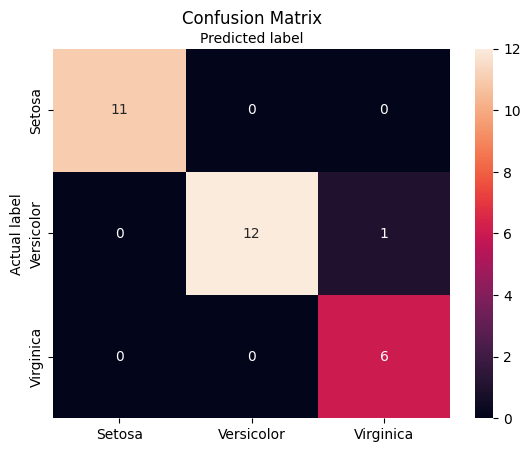

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
confMatrix = confusion_matrix(y_test, y_pred)
# create heatmap
ax = sns.heatmap(pd.DataFrame(confMatrix), annot= True, fmt = 'g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Setosa','Versicolor','Virginica'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor','Virginica'])

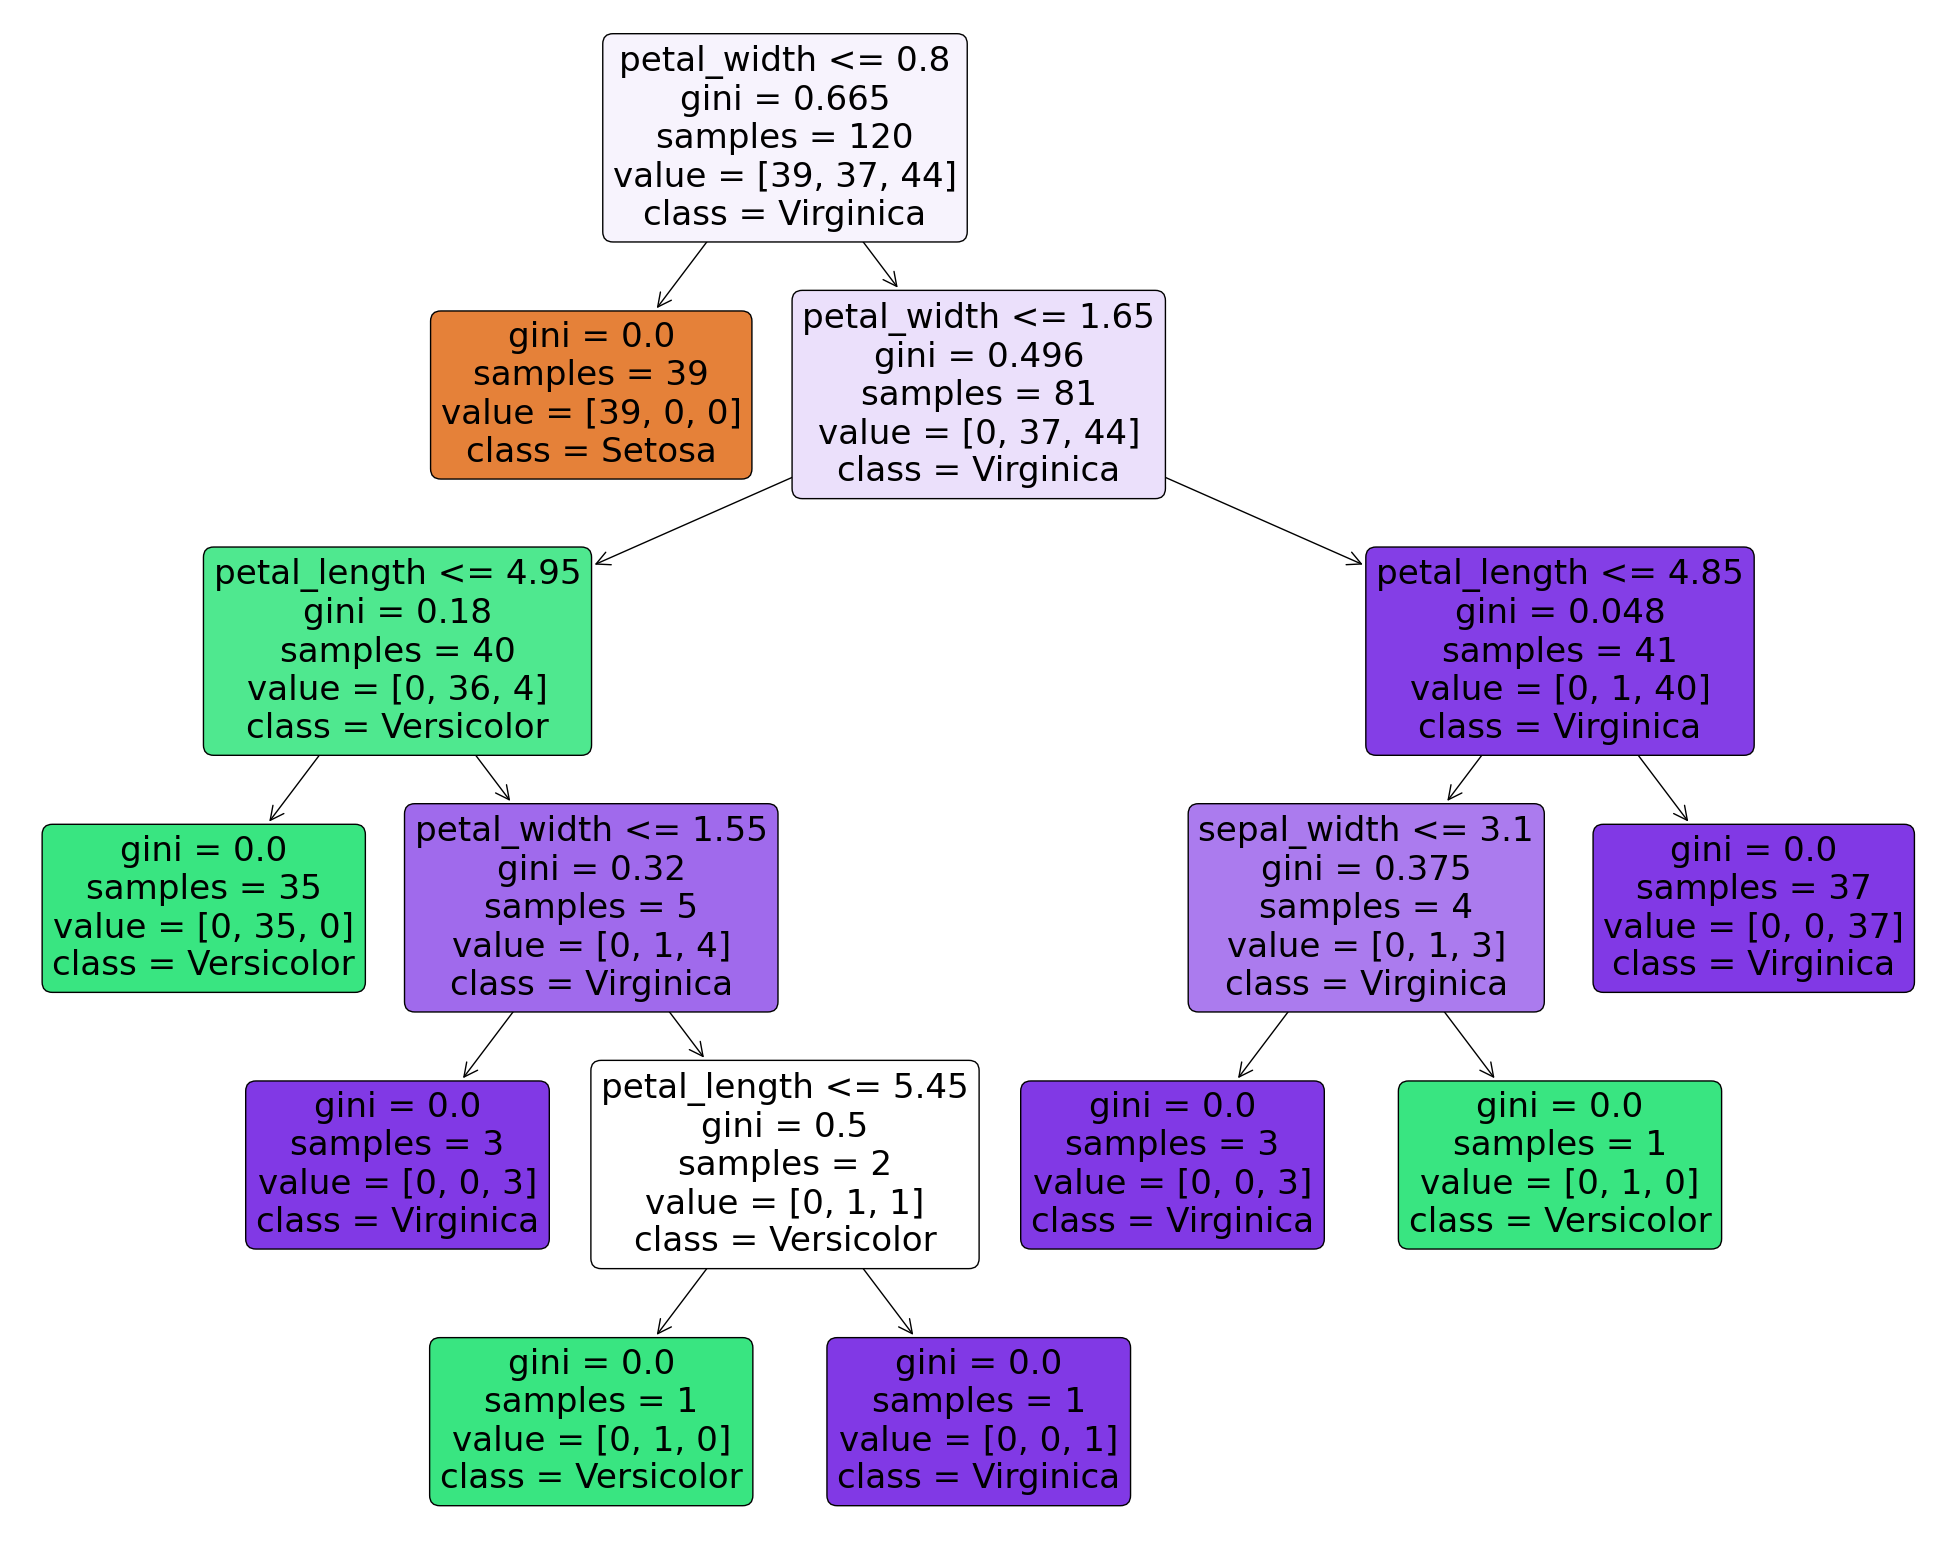

In [8]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,
                 feature_names = featureNames,
                 class_names = classNames,
                 filled = True,
                 rounded= True)